# Comparing models

##### The goals of this notebook:
- find the best polynomial degree for polynomial regression by testing empirically
- find the best number of layers and neurons per layer for neural network
- compare the models found for polynomial regression and neuralnetwork

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [21]:
# Import data
df = pd.read_csv("cleaned_data.csv")

df

,Time,Cases,Close,next_Close
0,0,0,4352.100098,4315.410156
1,1,0,4324.770020,4322.740234
2,2,0,4344.259766,4300.080078
3,5,0,4246.680176,4294.100098
4,6,0,4323.930176,4359.759766
...,...,...,...,...
513,747,534790,5299.080078,5146.870117
514,748,542262,5287.819824,5209.259766
515,749,546782,5339.259766,5229.529785
516,750,559587,5297.140137,5151.890137


In [22]:
"""
Selecting the features(X) and the label(y)
    Label: "Close"
    Features: "Time", "Cases", "old_Close"
"""

y = df["next_Close"].to_numpy()
X = df[["Time","Cases","Close"]].to_numpy().reshape(-1,3)

#### Polynomial model
The next part consists of finding the best degree for polynomial model

In [23]:
# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) #The answer

# Define a list of polynomial degrees
degrees = list(range(1,10))

# These variables are for storing the errors for each polynomial degree
poly_tr_errors = []
poly_val_errors = []

# Loop over the degrees
for i, degree in enumerate(degrees):
    lin_regr = LinearRegression()

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    poly_tr_errors.append(tr_error)
    poly_val_errors.append(val_error)

    



In [24]:
print("{:<10s}{:<20s}{:<20s}".format("Degree", "Training error", "Validation error"))
for i in range(len(degrees)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(degrees[i], poly_tr_errors[i], poly_val_errors[i]))

Degree    Training error      Validation error    
1         14181               20530               
2         11837               16988               
3         8918                12060               
4         16861               21722               
5         17108               26644               
6         15036               30596               
7         20192               33972               
8         68167               215979              
9         105005              191236              


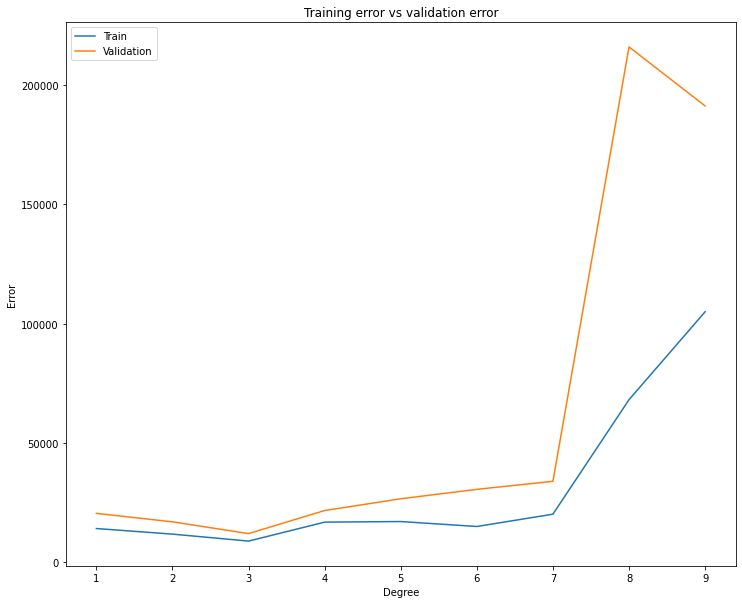

In [25]:
plt.figure(figsize=(12, 10))

plt.plot(degrees, poly_tr_errors, label = 'Train')
plt.plot(degrees, poly_val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

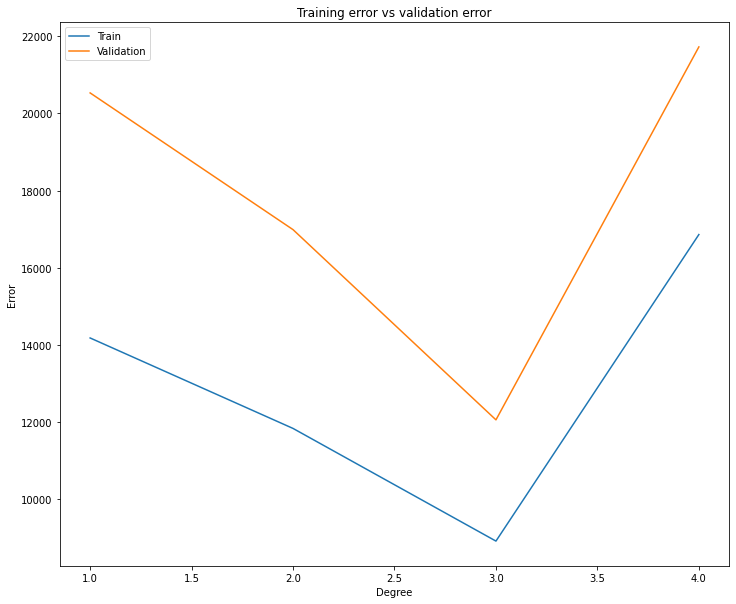

In [26]:
plt.figure(figsize=(12, 10))

n = 4
plt.plot(degrees[0:n], poly_tr_errors[0:n], label = 'Train')
plt.plot(degrees[0:n], poly_val_errors[0:n],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

#### Neural Network
The next part consists of finding the best number of layers and neuron per layer

In [90]:
# define a list of values for the number of layers and neurons per layer
num_layers = [1,2,4,6,8,10,15]
num_neurons = list(range(10,20))

# These variables are for storing the errors for each polynomial degree
mlp_tr_errors = []
mlp_val_errors = []

for i, layer in enumerate(num_layers):
    tr_error_row = []
    val_error_row = []
    for neuron in num_neurons:
        hidden_layer_size = tuple([neuron]*layer)

        mlp_regr = MLPRegressor(random_state=42, max_iter=10000, hidden_layer_sizes=hidden_layer_size)

        mlp_regr.fit(X_train, y_train)

        y_pred_train = mlp_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        y_pred_val = mlp_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)

        tr_error_row.append(tr_error)
        val_error_row.append(val_error)

    mlp_tr_errors.append(tr_error_row)
    mlp_val_errors.append(val_error_row)


In [91]:
for j in range (len(num_layers)):
    print("{:<10s}{:<20s}{:<20s}".format("Neurons", "Training error", "Validation error. Layers: " + str(num_layers[j]) ))
    for i in range(len(num_neurons)):
        print("{:<10d}{:<20.0f}{:<20.0f}".format(num_neurons[i], mlp_tr_errors[j][i], mlp_val_errors[j][i]))

Neurons   Training error      Validation error. Layers: 1
10        15424               21131               
11        17923               25548               
12        20999               27950               
13        19797               24202               
14        15986               20501               
15        23093               33437               
16        20665               30353               
17        33480               38971               
18        16857               22799               
19        13750               20469               
Neurons   Training error      Validation error. Layers: 2
10        16647               22133               
11        14108               20453               
12        16764               22026               
13        15877               21290               
14        16032               20803               
15        15813               22899               
16        16225               22353               
17        15774  

In [63]:
print("{:<10s}{:<20s}{:<20s}".format("Leyers", "Training error", "Validation error. Neurons:" + str(num_neurons[0]) ))
for i in range(len(num_layers)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(num_layers[i], mlp_tr_errors[i][0], mlp_val_errors[i][0]))

Leyers    Training error      Validation error. Neurons:10
1         15424               21131               
2         16647               22133               
3         14363               23106               
4         13366470            14849964            
5         13490323            13427972            
6         12597938            13426181            
7         21830               24634               
8         14862               23328               
9         20256               25382               
10        40602               53376               
11        12555483            13158656            
12        29592               37262               
13        16837               22695               
14        16440               21161               
